# CONSIGNA 1
Dada la foto Will(Original).bmp que llevó Joyce a la estación de policía y la lista de fotos obtenidas por el sistema de búsqueda, implementar un algoritmo que permita ordenar la lista según su parecido con la foto de Will que entregó Joyce, utilizando el factor de correlación como medida de similitud. Analizar los resultados obtenidos.


**Carga de las imagenes de Will (original y a comparar)**

In [48]:
import os
import imageio

filenames = os.listdir("img")
filenames.sort()
print(filenames)

will_original = imageio.imread(os.path.join("img",filenames[0]))
will_fotos_busqueda = []
for i in range(1,6):
  will_fotos_busqueda.append( imageio.imread(os.path.join("img",filenames[i])))  

will_policia = imageio.imread(os.path.join("img",filenames[-1]))

['Will(Original).bmp', 'Will_1.bmp', 'Will_2.bmp', 'Will_3.bmp', 'Will_4.bmp', 'Will_5.bmp', 'Will_Canal10.bmp', 'Will_Canal2.bmp', 'Will_Canal8.bmp', 'Will_ej2.bmp']


**Calculo de la media (o media cuadrada) de intensidad de pixel de una imagen**

In [49]:
import math

def media(imagen, cuadrada=False):
    largo = len(imagen)
    ancho = len(imagen[0])
    acumulador = 0
    
    #se recorre la imagen
    for x in range(largo):
        for y in range(ancho):
            #y se van acumulando la suma de las intensidades
            if cuadrada:
                acumulador += int(imagen[x][y]) * int(imagen[x][y]) #se hacen conversiones a int xq... (completar)
            else:
                acumulador += int(imagen[x][y])
                
    #luego se divide el total por la cantidad de pixel y se obtiene la media
    return float(acumulador)/(largo*ancho)

**Calculo del desvio estandar de intensidad de pixel de una imagen utilizando su media

In [50]:
def desvio(imagen, media_imagen):
    media_cuadrada_imagen = media(imagen,True)
    varianza = media_cuadrada_imagen - (media_imagen*media_imagen)
    desvio = math.sqrt(varianza)
    
    return desvio

**Calculo de la correlación cruzada entre dos imagenes**

In [51]:
def correlacion_cruzada(imagen_a,imagen_b):
    suma_ambos = 0
    largo = len(imagen_a)
    ancho = len(imagen_a[0])
    for x in range(largo):
        for y in range(ancho):
            suma_ambos += int(imagen_a[x][y]) * int(imagen_b[x][y])
            
    return  float(suma_ambos)/(largo*ancho)

**Calculo del factor de correlación cruzada entre dos imagenes**

In [52]:
def factor_correlacion_cruzada(imagen_a,imagen_b):
    media_a = media(imagen_a)
    media_b = media(imagen_b)
    desvio_a = desvio(imagen_a, media_a)
    desvio_b = desvio(imagen_b, media_b)
    correlacion_cruzada_ambas = correlacion_cruzada(imagen_a,imagen_b)

    return round((float(correlacion_cruzada_ambas - (media_a*media_b))) / (desvio_a*desvio_b) , 5)

**Obtención y ordenamiento de las correlaciones obtenidas de cada imagen**

In [53]:
import numpy as np

resultados = []
i = 1
for imagen in will_fotos_busqueda:
    print("Procesado imagen " + str(i) + " ...")
    corr = factor_correlacion_cruzada(will_original,imagen)
    resultados.append(("Imagen " + str(i), corr,imagen))
    i += 1
    
# ordenar los resultados
resultados.sort(key=lambda x: x[1], reverse=True)
for r in resultados:
    print(r[0],":",r[1])

Procesado imagen 1 ...
Procesado imagen 2 ...
Procesado imagen 3 ...
Procesado imagen 4 ...
Procesado imagen 5 ...
Imagen 1 : 0.97888
Imagen 2 : 0.97796
Imagen 3 : 0.92256
Imagen 5 : 0.91331
Imagen 4 : 0.82071


# CONSIGNA 2
Un policía amigo de Joyce llegó a la estación de policía un rato más tarde, trayendo consigo otra foto para analizarla. El policía de guardia, para ahorrarse la búsqueda en el SIDPE, propuso estudiar las similitudes respecto a la imagen que llevó Joyce mediante esta estrategia a implementar: Obtener la distribución de intensidades de la imagen de la foto que llevó Joyce, de la foto del niño más parecido (obtenida por el sistema de búsqueda) y de la foto que tenía el policía en su billetera. Generar el histograma de cada imagen y calcular la media y el desvío de cada distribución. Analizar las similitudes y diferencias entre uno y otro indicador.

**Calculo de la distribucción de intensidades a partir de una imagen**

In [54]:
def distribucion_intensidad(imagen):
    #Hay muchos valores de intesidad que las imagenes no toman
    #por esa razón es más eficiente utilizra un mapa en vez de un arreglo.
    dist = {}
    largo = len(imagen)
    ancho = len(imagen[0])
    for x in range(largo):
        for y in range(ancho):
            valor = (int)(imagen[x][y])
            if valor in dist:
                dist[valor] += 1
            else:
                dist[valor] = 1
    for key in dist:
        dist[key]=dist[key]/(largo*ancho)
    
    return dist

**Obtención de distribuciones**

In [55]:
will_parecida = will_fotos_busqueda[0]

distribucion_original = distribucion_intensidad(will_original)
distribucion_parecida = distribucion_intensidad(will_parecida)
distribucion_policia = distribucion_intensidad(will_policia)

print(distribucion_original)
print(distribucion_parecida)
print(distribucion_policia)

{221: 0.360416255051639, 238: 0.19880422092501124, 204: 0.08321239335428827, 187: 0.05222900763358779, 170: 0.048701841041760216, 153: 0.04666771441400988, 136: 0.04238796587337225, 119: 0.03527929950606197, 255: 0.008626852267624607, 102: 0.029128423888639426, 85: 0.025297709923664122, 68: 0.025161652447238437, 51: 0.02414683430624158, 34: 0.015194881005837449, 17: 0.004271216883700045, 0: 0.00047373147732375395}
{221: 0.4157265379434216, 238: 0.19262191288729233, 204: 0.07130848675348002, 187: 0.04102649303996408, 170: 0.041006286484059275, 153: 0.04099775482712169, 136: 0.03805253704535249, 119: 0.03213920071845532, 102: 0.0272240682532555, 255: 0.007630893578805568, 85: 0.024198473282442748, 68: 0.024454422990570275, 51: 0.023817691962281097, 34: 0.015106870229007634, 17: 0.004220925011225864, 0: 0.00046744499326448137}
{255: 0.4824301751234845, 221: 0.0699272563987427, 187: 0.06918679838347552, 170: 0.050990121239335426, 153: 0.04777503367759318, 238: 0.024907049842837897, 136: 0.

**Generación del gráfico que muestra los histogramas de las distribuciones de intensidades**

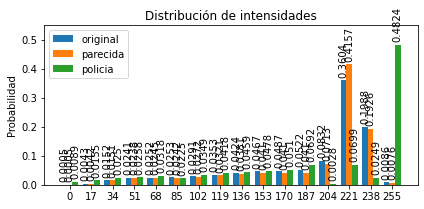

In [56]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict



def autolabel(rects,ax):
    for rect in rects:
      height = round((float)(rect.get_height()),4)
      ax.annotate('{}'.format(height),
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom',fontsize=10,rotation=90)
        
def histogram_multiple(distribucion1,label1,distribucion2,label2,distribucion3,label3):
    plt.rcParams['figure.figsize'] = (6,3)
    
    #ordenamos los diccionarios por clave (intensidades)
    d1 = OrderedDict(sorted(distribucion1.items()))
    d2 = OrderedDict(sorted(distribucion2.items()))
    d3 = OrderedDict(sorted(distribucion3.items()))
    b = OrderedDict(sorted(distribucion_original.items()))

    #obtenemos las intensidades a partir de cualquier diccionario
    intensidades = list(d1.keys())
    
    #obtenemos los valores
    d1_valores = list(d1.values())
    d2_valores = list(d2.values())
    d3_valores = list(d3.values())


    ind = np.arange(len(intensidades))  # the x locations for the groups
    width = 0.525  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar((ind - width/2)*2, d1_valores, width,
                    label=label1)
    rects2 = ax.bar((ind)*2, d2_valores, width,
                    label=label2)
    rects3 = ax.bar((ind + width/2)*2, d3_valores, width,
                    label=label3)
    # escalas 
    plt.ylim(0, 0.55) #lo seteo entre 0 y 0.55 porque conozco entre que valores se mueven los histogramas

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Probabilidad')
    ax.set_title('Distribución de intensidades')
    ax.set_xticks(ind*2)
    ax.set_xticklabels(intensidades)
    ax.legend()
    
    autolabel(rects1,ax)
    autolabel(rects2,ax)
    autolabel(rects3,ax)

    fig.tight_layout()

    plt.show()
    
histogram_multiple(distribucion_original,'original',distribucion_parecida,'parecida',distribucion_policia,'policia')

**Calculo de la media (o media cuadratica) y el desvio de una distribución de probabilidades**

In [57]:
def media_dist(dist, cuadrada=False):
    suma = 0.0
    for x in dist:
        if(cuadrada):
            suma += x*x*dist[x]
        else:
            suma += x*dist[x]
            
    return float(suma)

def desvio_dist(dist, media_distribucion):
    media_cuadrada_dist = media_dist(dist,True)
    varianza = media_cuadrada_dist - (media_distribucion*media_distribucion)
    
    return math.sqrt(varianza)

**Obtención de los resultados de las medias y desvios de las distribuciones**

In [58]:
distribuciones = [(distribucion_original,"Dist original"), (distribucion_parecida,"Dist parecida"), (distribucion_policia,"Dist policia")]
for dist, nombre in distribuciones:
    media_distribucion = media_dist(dist)
    desvio_distribucion = desvio_dist(dist, media_distribucion)
    print(nombre)
    print(media_distribucion)
    print(desvio_distribucion)
    print("************")

Dist original
189.9449923664122
55.70177307571604
************
Dist parecida
192.4244961832061
55.15561366734102
************
Dist policia
195.15137404580153
73.83400301980652
************


# CONSIGNA 3

## Parte 1
Implementar un algoritmo que permita codificar una imagen mediante el método de Huffman y posteriormente reconstruirla mediante otro algoritmo decodificador (el archivo comprimido deberá contener la secuencia de bits codificados junto con los datos necesarios para la reconstrucción de la imagen original).

Nota: el algoritmo decodificador deberá permitir reconstruir los datos generados por el codificador y obtener la imagen original.

### Codificación

**Definición de una clase tipo árbol que se utiliza para la codificación de Huffman**

In [59]:
class Tree:
    def __init__(self,simbolo=None, prob=None, left=None, right=None):
        self.simbolo = simbolo
        self.prob = prob
        self.left = left
        self.right = right

    def is_leaf(self):
        return (self.left is None and self.right is None) 

    #def get_leaves(self):
    #  return self.__leaves(self)

    def get_leaves(self):
        if self.is_leaf():
            return [self]
        else:
            aux = []
        if self.left is not None:
            aux += self.left.get_leaves()
        if self.right is not None:
            aux += self.right.get_leaves()
        return aux

    def __repr__(self):
        return "<%s,%s>" % (self.simbolo, self.prob)

    def __str__(self):
        return "<%s,%s>" % (self.simbolo, self.prob)

**Calculo de los dos nodos de probabilidades más chicas de un arreglo de nodos, fusión y actulización de sus códigos**

In [60]:
def get_mas_chicos(arr):
    nodo1 = arr[0] # el valor mas chico
    nodo2 = arr[1] # el segundo mas chico
    i = 2
    while i < len(arr):
        if arr[i].prob < nodo1.prob :
            nodo2 = nodo1
            nodo1 = arr[i]
        elif arr[i].prob < nodo2.prob :
            nodo2 = arr[i]
        i += 1
        
    return nodo1,nodo2

#Actualiza los codigos de los nodos que fusiono
def actualizar_codigos(codigos,nodo1,nodo2):
    for hoja in nodo1.get_leaves() :
        codigos[hoja.simbolo] = '0' + codigos[hoja.simbolo]
    for hoja in nodo2.get_leaves() :
        codigos[hoja.simbolo] = '1' +codigos[hoja.simbolo]

#Fusiona los dos nodos de menor prob y los elimina de los nodos
def fusionar_nodos(nodos,nodo1,nodo2):
    nodos.remove(nodo1)
    nodos.remove(nodo2)
    grupo = Tree("grupito",nodo1.prob+nodo2.prob,nodo1,nodo2)
    nodo1.parent = grupo
    nodo2.parent = grupo
    
    return grupo

**Calculo del código de Huffman y el árbol que permite su construcción a partir de una distribución**

In [61]:
def generar_codigo_huffman(dist):
    nodos = []
    codigos = {}
    for key in dist:
        nodos.append(Tree(key,dist[key]))
        codigos[key] = ""
    while len(nodos) != 1:
        nodo1, nodo2 = get_mas_chicos(nodos)
        grupo = fusionar_nodos(nodos,nodo1,nodo2)
        actualizar_codigos(codigos,nodo1,nodo2)
        nodos.append(grupo)
    return codigos,nodos[0]

**Obtención de código de Huffman y su árbol a partir de la distribución de probabilidades de las intensidades de la imagen de Will original**

In [62]:
codigos_will_original,arbol_will_original = generar_codigo_huffman(distribucion_original)

def print_arbol(nodo, level):
    if nodo.is_leaf():
        print("----"*level + "   => "+ str(nodo.simbolo) + " | " + str(nodo.prob))
    else:
        level = level+1
        print("----"*level + "0")
        print_arbol(nodo.left,level)
        print("----"*level + "1")
        print_arbol(nodo.right,level)
    
print_arbol(arbol_will_original,0)
print("Codigos generados:",codigos_will_original)

----0
--------0
------------0
----------------0
----------------   => 136 | 0.04238796587337225
----------------1
----------------   => 153 | 0.04666771441400988
------------1
----------------0
----------------   => 170 | 0.048701841041760216
----------------1
--------------------0
--------------------   => 51 | 0.02414683430624158
--------------------1
--------------------   => 68 | 0.025161652447238437
--------1
------------0
----------------0
----------------   => 187 | 0.05222900763358779
----------------1
--------------------0
--------------------   => 85 | 0.025297709923664122
--------------------1
------------------------0
----------------------------0
--------------------------------0
--------------------------------   => 0 | 0.00047373147732375395
--------------------------------1
--------------------------------   => 17 | 0.004271216883700045
----------------------------1
----------------------------   => 255 | 0.008626852267624607
------------------------1
------------------

**Guardado y cargado de lista de bits de un archivo**

In [63]:
def guardar_bits_a_archivo(lista_de_bits, nombre_archivo):
           
    lista_de_bytes = []

    # cada 8 bits, tengo que armar un char
    for i in range(0, len(lista_de_bits), 8):
        
        # me quedo con 8 caracteres de la lista de bits
        ocho_bits = lista_de_bits[i:i+8]
        
        # necesito primero convertirlo a entero (4 bytes!) y después a chr (8 bits)
        # PATCH: para evitar problemas de codificación UNICODE / UTF-8 / etc, mapeamos
        # ese char que generamos a un byte en codificaciones ASCII extendido (en Python
        # la llaman latin1).
        byte = bytes(chr(int(''.join([str(bit) for bit in ocho_bits]), 2)), encoding="latin1")
        
        # lo pongo en mi lista de bytes
        lista_de_bytes.append(byte)

    # y los escribo en mi archivo como datos en bytes
    with open(nombre_archivo, 'wb') as f:
        for byte in lista_de_bytes:
            f.write(byte)

def leer_bits_de_archivo(nombre_archivo):
    # inicializo la lista de bytes
    lista_de_bytes = []

    # ahora leo el archivo, poniendo cada byte que leo en la lista
    with open(nombre_archivo, 'rb') as f:
        while True:
            byte = f.read(1)
            if byte:
                lista_de_bytes.append(byte)
            else:
                break

    # recorro la lista de bytes y voy convirtiendo el char a binario
    result = []
    for byte in lista_de_bytes:
        bits = bin(ord(byte))[2:]
        bits = '00000000'[len(bits):] + bits
        result.extend([int(b) for b in bits])
    
    return result

**Definición de las funciones necesarias para codificar la imagen completa (datos + header) y obtener una lista de bits lista para guardarla en un archivo**

In [64]:
# Formato del header:
# [0,7] #simbolos 
# [8,10] bits_extra 
# [11,50] ancho 
# [51,51 + #simbolos * 40 - 1] (simbolo, freq) 
# datos  
# tantos bits en 0 como diga bits_extra
# ----------------------------------------------}

# Definicion de los tamaños en bits de todas las partes que componen al header
HEADER_CANT_SIMBOLOS = 8
HEADER_BITS_EXTRA = 3
HEADER_ANCHO = 40
HEADER_SIMBOLO = 8
HEADER_FREQ = 32

# Funcion que convierte un número entero a binario con una longitud deseada de bits,rellenando con ceros de ser necesario
def get_conversion_a_binario(valor,longitud_deseada):
    lista_bits = [int(x) for x in bin(valor)[2:]]
    if len(lista_bits) < cantidad_deseada:
        lista_bits = [0]*(cantidad_deseada - len(lista_bits)) + lista_bits   
    return lista_bits

# Funcion que crea el header a partir de los datos de la distribucion: ancho, largo y bits_extra
def get_header_binario(dist,ancho,largo,bits_extra):
    
    # Se obtiene la lista de bits para #simbolos
    bits_simbolos = get_conversion_a_binario(len(dist),HEADER_CANT_SIMBOLOS)
    
    # Se obtine la lista de bits para bits_extra
    bits_extra = get_conversion_a_binario(bits_extra,HEADER_BITS_EXTRA)
    
    # Se obtiene la lista de bits para el ancho
    bits_ancho = get_conversion_a_binario(ancho,HEADER_ANCHO)

    # Se crea la lista de bits para la distribucion de frecuencias
    bits_dist = []
    for key in dist:
        bits_dist += get_bitlist(key,HEADER_SIMBOLO)
        bits_dist += get_bitlist((int)(dist[key]*ancho*largo),HEADER_FREQ)
    
    # Se concatenan las listas de bits
    bits_header = bits_simbolos + bits_extra + bits_ancho + bits_dist
  
    return bits_header

# retorna la lista de bits correspondiente a la codificación de la imagen, lo que representa 
#los datos en la compresión final
def get_codificacion_datos(imagen,codigos):
    codificacion = []
    for i in range(len(imagen)):
        for j in range(len(imagen[i])):
            for c in codigos[imagen[i][j]]:
                codificacion.append((int)(c))
                
    return codificacion

# retorna la lista de bits correspondiente a la codificación completa de la imagen más el header
def get_codificacion_imagen(imagen,distribucion):
    
    # Se crea el codigo de huffman asociado a la distribucion
    codigos,arbol = generar_codigo_huffman(distribucion)
    
    # Se crea la parte de datos del archivo
    datos = get_codificacion(imagen,codigos)
    
    # Bits extra son los bits que hay que agregar para que el tamaño de datos sea multiplo de 8
    bit_sobra = (3+len(datos))%8
    bit_extra = 0
    if(bit_sobra != 0):
        bit_extra = 8-bit_sobra
    
    # Si hay que agregar bits se agregan
    for i in range(0,bit_extra):
        datos.append(0)
    
    # Se crea el header
    header = crear_header(distribucion,len(imagen[0]),len(imagen),bit_extra)
    
    # Se retorna la lista de bits del archivo para guardarla
    return header + datos;

### Decodificación

**Guardado de la lista de bits que representa la codificación de una imagen en un archivo utilizando las funciones definidas previamente**

In [65]:
def guardar_imagen_en_archivo(imagen, distribucion,nombre_archivo="imagen.teoinfo"):
    # Genero codificacion huffman
    diccionario, arbol = generar_codigo_huffman(distribucion)
    # Transformo mi imagen en codigo de bits
    datos = generar_codigo(imagen, diccionario)

    # Calculo los bits extra y los agrego como ceros
    bit_sobra = (3+len(datos))%8
    bit_extra = 0 if bit_sobra == 0 else 8-bit_sobra
        
    for i in range(0,bit_extra):
        datos.append(0)
    
    # Construyo el header
    header = crear_header(distribucion,len(imagen[0]),len(imagen),bit_extra)
    # Uno header y datos
    lista_de_bits = header + datos
    # Guardo a archivo
    guardar_bits_a_archivo(lista_de_bits, nombre_archivo)

**Definición de las funciones necesarias para decodificar una lista de bits que representan los datos + header y construir la imagen correspondiente**

In [66]:
# Funcion que dada una lista de bits retorna el valor asociado a esta
def get_conversion_a_decimal(lista_de_bits):
    valor = 0
    for bit in lista_de_bits:
        valor = (valor << 1) | bit
    return valor

# Funcion que dada una lista de bits del tipo de archivo '.teoinfo' devuelve la distribucion,
#los datos y el ancho por separado
def get_partes_del_header(lista_de_bits):
        
    # Se lee #simbolos
    inicio = 0
    fin = HEADER_CANT_SIMBOLOS
    simbolos = get_conversion_a_decimal(lista_de_bits[inicio:fin])
    
    # Se lee bits_extra
    inicio = fin
    fin = inicio + HEADER_BITS_EXTRA
    bit_extra = get_conversion_a_decimal(lista_de_bits[inicio:fin])
    
    # Se lee ancho
    inicio = fin
    fin = inicio + HEADER_ANCHO
    ancho = get_conversion_a_decimal(lista_de_bits[inicio:fin])
    
    # Variables para rearmar la distribucion 
    dist = {}
    acum = 0
    
    # Se lee la distribucion que se encuentra en el header
    inicio_simbolo = fin
    fin_simbolo = inicio_simbolo + HEADER_SIMBOLO
    inicio_freq = fin_simbolo
    fin_freq = inicio_freq + HEADER_FREQ
    offset = HEADER_SIMBOLO + HEADER_FREQ
    for i in range(0,simbolos):
        simb = get_int_value(lista_de_bits[inicio_simbolo:fin_simbolo])
        freq = get_int_value(lista_de_bits[inicio_freq:fin_freq])
        dist[simb] = freq
        acum += freq
        inicio_simbolo += offset
        fin_simbolo += offset
        inicio_freq += offset
        fin_freq += offset
    
    # Como viene dada por la frecuencia se divide por el total para obtener probabilidades
    for key in dist:
        dist[key] = dist[key]/acum
    
    # Se leen los datos sin leer los bits extra
    inicio = HEADER_CANT_SIMBOLOS + HEADER_BITS_EXTRA + HEADER_ANCHO + simbolos*offset
    datos = lista_de_bits[inicio:-bit_extra]
    
    return dist,datos,ancho

# Funcion que dado las datos, el arbol de Huffman y el ancho decodifica los datos y construye la imagen correspondiente
def get_imagen_construida(raiz, datos, ancho):
    imagen = [[]]
    index_datos = 0
    index_columna = 0
    index_fila = 0
    arbol = raiz
    while index_datos < len(datos):            
        if index_columna >= ancho:
            index_fila += 1
            imagen.append([])
            index_columna = 0
                    
        while arbol.is_leaf() == False and index_datos < len(datos):
            if int(datos[index_datos]) == 0:
                arbol = arbol.left
            else:
                arbol = arbol.right
            index_datos += 1
        
        imagen[index_fila].append(arbol.simbolo)
        index_columna += 1
        arbol = raiz
        
    return imagen

# Lee una imagen guardada en el formato '.teoinfo', la decodifica y obtiene las partes necesarias 
# para la construcción de la imagen correspondiente
def get_decodificacion_imagen(nombre_archivo="imagen.teoinfo"):
    
    # Obtengo lista de bits
    bits = leer_bits_de_archivo(nombre_archivo)

    # Separo los datos del header (distribución y el ancho de la imagen) 
    dist, datos, ancho = get_imagen_construida(bits)

    # Armo el árbol para hacer la decodificación de los datos
    codigos,raiz = generar_codigo_huffman(dist)

    # Armo la imagen a partir del arbol, los datos y el ancho
    imagen = get_imagen_construida(raiz, datos, ancho)

    return imagen

## Parte 2
a) Comprimir con Huffman semi-estático la imagen original.
b) Comprimir la imagen del resultado más parecido con el código de Huffman asociado a la imagen original.
c) Comprimir la imagen que trajo el policía con el código de Huffman asociado a la imagen original.
d) Comprimir la imagen que trajo el policía utilizando Huffman semi-estático, esta vez utilizando el código generado para la propia imagen. Comparar con el resultado del inciso anterior.
e) Comparar las tasas de compresión obtenidas por las compresiones en los ejercicios (a), (b), (c) y (d). Nota: el algoritmo decodificador deberá permitir reconstruir los datos generados por el codificador y obtener la imagen original.

**Compresión y descompresión de las imagenes correspondientes**

In [67]:
# a)
almacenar_imagen(will_original, distribucion_original,"willoriginal.teoinfo")
# b)
# Uso la distribucion de la original para que el codigo de huffman sea el de la original y el header refleje tambien esto
almacenar_imagen(will_parecida, distribucion_original,"willparecida_orig.teoinfo")
#c)
almacenar_imagen(will_policia, distribucion_original,"willpolicia_orig.teoinfo")
#d)
almacenar_imagen(will_policia, distribucion_policia,"willpolicia.teoinfo")

imagenes_reconstruidas = [
    (will_original,decodificar("willoriginal.teoinfo")),
    (will_parecida,decodificar("willparecida_orig.teoinfo")),
    (will_policia,decodificar("willpolicia_orig.teoinfo")),
    (will_policia,decodificar("willpolicia.teoinfo")),
]

**A continuación se muestra que las imagenes se descomprimen correctamente**

Populating the interactive namespace from numpy and matplotlib


c:\env\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random', 'f', 'mat']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


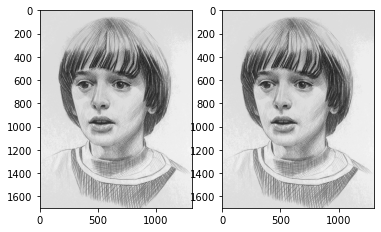

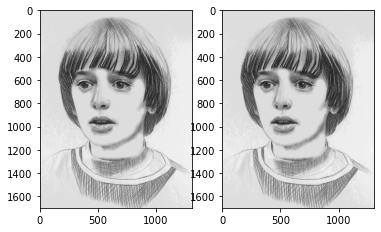

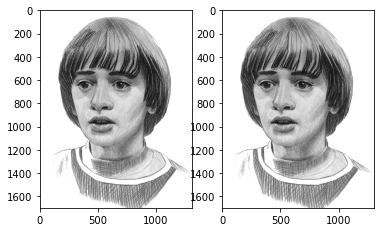

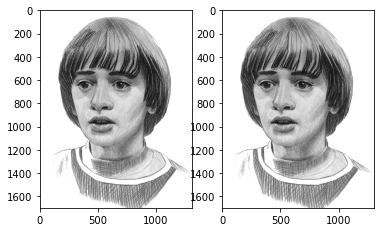

In [68]:
%pylab inline
import matplotlib.pyplot as plt

for i1,i2 in imagenes_reconstruidas:
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(i1,cmap='gray',vmin=0,vmax=255)
    axarr[1].imshow(i2,cmap='gray',vmin=0,vmax=255)

    plt.show()

# CONSIGNA 4
Tres canales de televisión distintos (Canal 2, Canal 8 y Canal 10) transmiten todos los días la fotografía de Will. Sin embargo, un fenómeno extraño hace que cada canal distorsione las imágenes de diferente forma. Al notarlo, el comisario de policía decidió estudiar el ruido de cada uno, esperando que esta información permita encontrar al joven Will. Considerando que la imagen de entrada a cada canal es la foto de Will provista por su madre al llegar a la estación de policía, y las imágenes a la salida de cada canal son las siguientes, resuelva:

a) Implementar un algoritmo que calcule la matriz de transición que describe cada canal. 
B) Implementar un algoritmo que calcule el ruido de cada canal utilizando muestreo computacional. Generar un gráfico que permita estudiar la evolución del error y la convergencia.


**Calculo de la matriz condicional entre dos imagenes: p(intensidad_im2 / intensidad_im1)**

In [69]:
def get_matriz_condicional(imagen1, imagen2):    
    condicional =  {}
    total_ent = {}
    for i in range(len(imagen1)):
        for j in range(len(imagen1[i])):
            entrada = imagen1[i][j] 
            if entrada in condicional:
                total_ent[entrada] += 1
                mapa_salida = condicional[entrada]
                salida = imagen2[i][j]
                if salida in mapa_salida:
                    mapa_salida[salida] += 1
                else:
                    mapa_salida[salida] = 1
            else:
                condicional[entrada] = {imagen2[i][j]:1}
                total_ent[entrada] = 1
    for key_entrada, mapeo in condicional.items():
        for key_salida, ocurrencias in mapeo.items():
            condicional[key_entrada][key_salida] = ocurrencias/total_ent[key_entrada]
    return condicional


**Obtención de las matrices de transición (condicionales) entre la imagen original de will y las imagenes de los canales**

In [70]:
matrices_transicion = []
for i in range(6,9):
    imagen_canal = imageio.imread(os.path.join("img",filenames[i]))
    matriz = get_matriz_condicional(will_original, imagen_canal)
    matrices_transicion.append((matriz,filenames[i]))  


**Calculo del ruido análitico de un canal a partir de la matriz condicional y la distribución de entrada**

In [71]:
def get_ruido(matriz,total_entrada):
    ruido = 0
    for key_entrada,mapeo in matriz.items():
        r = 0
        for key_salida, prob in mapeo.items():
            r -= prob *  math.log2(prob)
            #ruido += distribucion_original[key_entrada]*r
        ruido += total_entrada[key_entrada]*r
    return ruido

**Obtención de los ruidos análiticos correspondientes a los canales 2, 8 y 12**

In [72]:
ruidos_analiticos = {}
for mat,nombre in matrices_transicion:
    ruidos_analiticos[nombre] = get_ruido(mat,distribucion_original)
    print(nombre, " RUIDO: ", ruidos_analiticos[nombre])

Will_Canal10.bmp  RUIDO:  2.465840542994469
Will_Canal2.bmp  RUIDO:  3.643027393894621
Will_Canal8.bmp  RUIDO:  3.790633817038785


**Definición de funciones necesarias para calcular el ruido por muestreo computacional**

In [73]:
# B) Implementar un algoritmo que calcule el ruido de cada canal utilizando muestreo computacional. Generar un gráfico que permita estudiar la evolución del error y la convergencia.

import random
def get_acumulada(dist):
    acumulada = {}
    acum = 0.0
    for intensidad,probabilidad in dist.items():
        acum += probabilidad
        acumulada[intensidad] = acum
    return acumulada 

def get_acumulada_cond(condicional):
    acumulada_cond = {}
    for intensidad_entrada, mapa_salida in condicional.items():
        acumulador = 0.0
        acumulada_cond[intensidad_entrada] = {}
        for intensidad_salida, probabilidad in mapa_salida.items():
            acumulador += probabilidad
            acumulada_cond.get(intensidad_entrada)[intensidad_salida] = acumulador
    return acumulada_cond

def get_entrada(acumulada):
    rand = random.uniform(0,1)
    items = acumulada.items()
    for intensidad,probabilidad in items:
        if(rand < probabilidad):
            return intensidad
    return items[-1][0]

def pasar_por_canal(acumulada_cond,entrada):
    rand = random.uniform(0,1)
    items = acumulada_cond.get(entrada).items()
    for intensidad,probabilidad in items:
        if(rand < probabilidad):
            return intensidad
    return items[-1][0]

def actualizar_conjunta(conjunta,entrada,salida):
    if entrada in conjunta:
        mapa = conjunta.get(entrada)
        if salida in mapa: 
            mapa[salida] +=1
        else:
            mapa[salida] = 1
    else:
        conjunta[entrada] = {salida: 1}

def actualizar_total(total_entrada,entrada):
    if entrada in total_entrada:
        total_entrada[entrada] += 1
    else:
        total_entrada[entrada] = 1

def converge(v_ant, v_act,epsilon):
    return abs(v_act-v_ant) < epsilon

def ruido(acumulada_entrada,acumulada_cond,epsilon,min_iteraciones, ruido_analitico):
    conjunta = {}
    total_entrada = {}
    ruido_ant = -1 
    ruido_act = 0
    iteracion = 0
    error = []
    convergencia = []
    milestone = 1
    
    while(not converge(ruido_ant,ruido_act,epsilon) or iteracion < min_iteraciones):
        entrada = get_entrada(acumulada_entrada)
        salida = pasar_por_canal(acumulada_cond,entrada)
        
        actualizar_conjunta(conjunta,entrada,salida)
        actualizar_total(total_entrada,entrada)
        
        iteracion += 1
        ruido_ant = ruido_act
        ruido_act = 0
        for entrada,mapa in conjunta.items():
            for salida,freq_conjunta in mapa.items():
                ruido_act -= freq_conjunta / iteracion * math.log(freq_conjunta/total_entrada[entrada],2)
        
        if iteracion == 2 ** milestone:
            error.append(abs(ruido_act - ruido_analitico))
            convergencia.append(ruido_act - ruido_ant)
            milestone += 1
            
    return ruido_act,error, convergencia

**Obtención de los gráficos que permiten estudiar la evolución del error y la convergencia del ruido**

Will_Canal10.bmp  RUIDO:  2.448207336992488


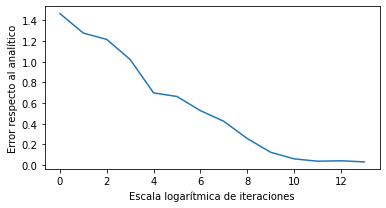

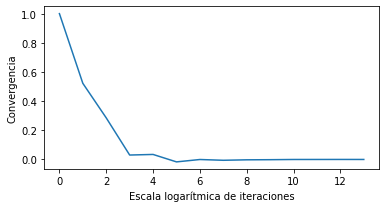

Will_Canal2.bmp  RUIDO:  3.6411774676533066


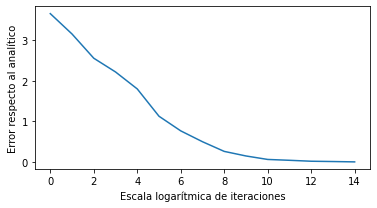

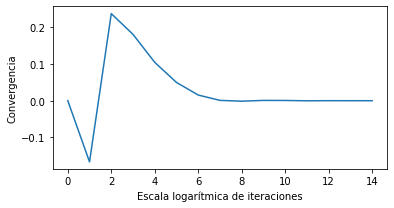

Will_Canal8.bmp  RUIDO:  3.775983433565216


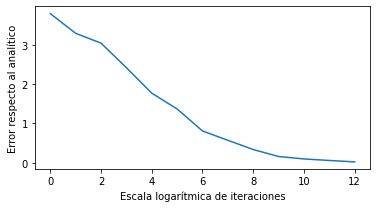

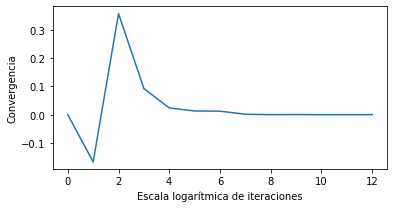

In [74]:
plt.rcParams['figure.figsize'] = (6,3)

acumulada = get_acumulada(distribucion_original)
#epsilon = 0.0000000001
epsilon = 0.000000001
min_iteraciones = 10000

for mat,nombre in matrices_transicion:
    acumulada_cond = get_acumulada_cond(mat)
    ruido_muestreo,error, convergencia = ruido(acumulada,acumulada_cond,epsilon,min_iteraciones,ruidos_analiticos[nombre])
    print(nombre, " RUIDO: ", ruido_muestreo)
    plt.plot(error)
    plt.ylabel('Error respecto al analítico')
    plt.xlabel('Escala logarítmica de iteraciones')
    plt.show()
    plt.plot(convergencia)
    plt.ylabel('Convergencia')
    plt.xlabel('Escala logarítmica de iteraciones')
    plt.show()